In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!pip install liac-arff
import pandas as pd
pd.set_option('display.max_column', 250)
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-notebook')
from matplotlib import rcParams
rcParams['figure.figsize'] = (6, 4)
rcParams['figure.dpi'] = 150

import sys
sys.path.append('/content/gdrive')

  Stored in directory: /root/.cache/pip/wheels/d1/6a/e7/529dc54d76ecede4346164a09ae3168df358945612710f5203
Successfully built liac-arff


## Formulas

In [0]:
def read_arff(path):
    import arff
    data = arff.load(open(path))
    cnames = [i[0] for i in data['attributes']]
    df = pd.DataFrame(data['data'], columns=cnames)
    return df

def preprocess(DataFrame):
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    le = LabelEncoder()
    #sc = StandardScaler()
    y = le.fit_transform(y)
    #X = sc.fit_transform(X)
    from sklearn.model_selection import train_test_split
    return X, y

In [0]:
from tqdm import tnrange, tqdm_notebook

def prequential(n_init_tr, model, X, y, w):
    y_pred = []
    
    row_n = y.shape[0]

    for i in tnrange(row_n - n_init_tr):
        Xn = X.iloc[:n_init_tr+i,:]
        yn = y[:n_init_tr+i]
        if w>(n_init_tr+i):
            model.fit(Xn, yn)
            y_pred.append(model.predict(X.iloc[n_init_tr+i,:].values.reshape(1,-1)))
        else:
            model.fit(Xn.iloc[-w:,:], yn[-w:])
            y_pred.append(model.predict(X.iloc[n_init_tr+i,:].values.reshape(1,-1)))
        
    pred_match = np.equal(np.array(y_pred).reshape(1,-1), y[n_init_tr:].reshape(1,-1))
    accuracy = np.cumsum(pred_match)/np.arange(1, pred_match.shape[1]+1)
    # returns average accuracy, predicted y and true y
    return accuracy, np.array(y_pred).reshape(1,-1), y[n_init_tr:].reshape(1,-1)

In [0]:
def plot_acc(avg_acc, model_name):
  plt.plot(avg_acc)
  plt.ylim(0.5,1)
  plt.xlabel('Iterations')
  plt.ylabel('Average Accuracy')
  plt.title(model_name + ' Average Accuracy')
  plt.show()

In [0]:
df = read_arff('gdrive/My Drive/Datasets/SINE.arff')
X, y = preprocess(df)

In [8]:
display(X.head()); y[:5]

,att1,att2,att3,att4
0,0.730878,0.410081,0.207715,0.332717
1,0.967756,0.006117,0.963705,0.939865
2,0.947195,0.937082,0.397174,0.347518
3,0.294057,0.506484,0.115967,0.770536
4,0.659893,0.156747,0.378202,0.139763


array([1, 1, 0, 0, 1])

## Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [50]:
nb_acc, nb_ypred, nb_ytrue = prequential(1000, , X, y, 5000)

KeyboardInterrupt: ignored

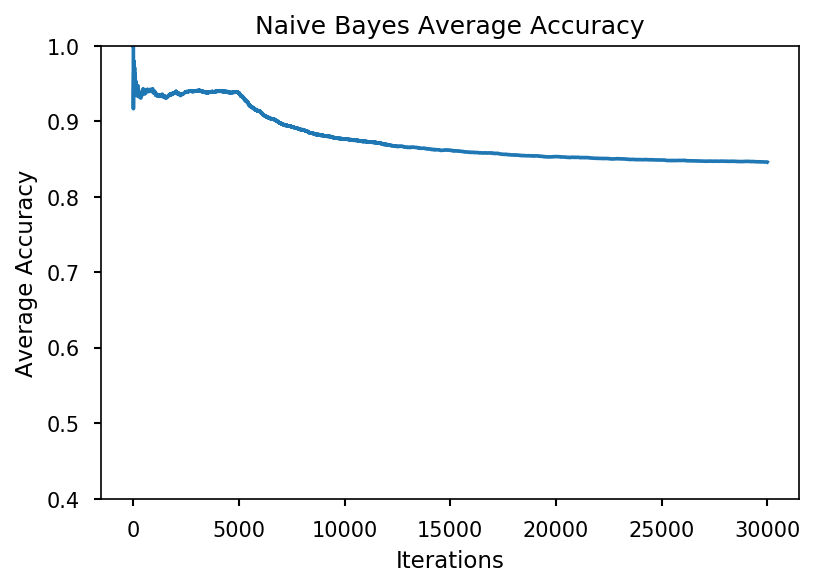

In [40]:
plot_acc(nb_acc, "Naive Bayes")

In [48]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score


print(
    precision_score(nb_ytrue, nb_ypred, average='samples'),
    recall_score(nb_ytrue, nb_ypred, average='samples'),
    f1_score(nb_ytrue, nb_ypred, average='samples')
)

0.8570628587428252 0.8261808367071525 0.8413385556242698


##  Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='sag')

In [51]:
nb_acc, nb_ypred, nb_ytrue = prequential(1000, lr, X, y, 5000)

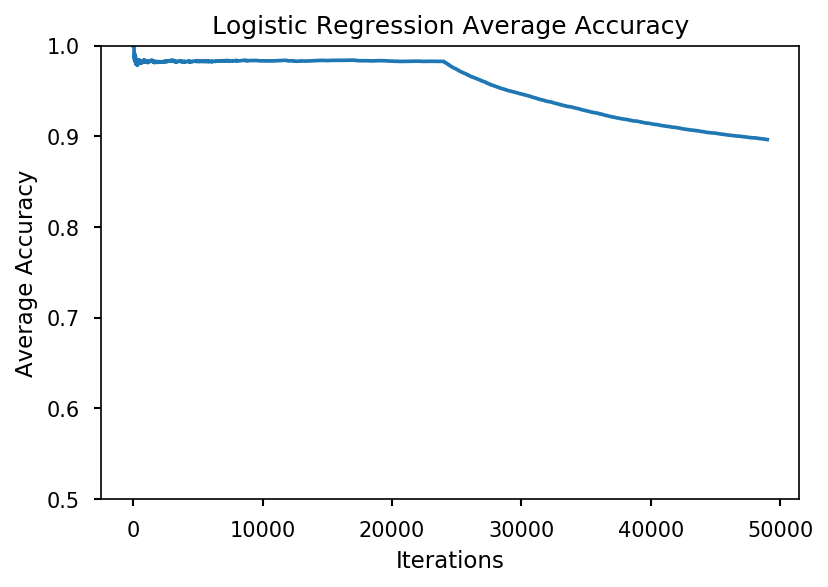

In [53]:
plot_acc(nb_acc, 'Logistic Regression')

## SVM

In [0]:
from sklearn.svm import SVC

svm = SVC()

In [0]:
smpl = df.sample(5000, random_state=42)
X_sampled, y_sampled = preprocess(smpl)

In [0]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50)

In [59]:
forest_acc, forest_ypred, forest_ytrue = prequential(1000, forest, X, y, 5000)